# Basics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Import data

In [3]:
data_senior = pd.read_csv('raw_data/senior_transportation.csv')
data_bus = pd.read_csv('raw_data/bus_routes.csv')
data_users = pd.read_csv('raw_data/churn_users.csv')
data_od = pd.read_csv('raw_data/churn_OD.csv')

In [4]:
data_bus
#linkid refers to a unique road segment which is originally provided by HERE API, according to the data provider

,IDRoute,linkid
0,1,537277300
1,1,537277673
2,1,537277754
3,1,537277777
4,1,537277795
...,...,...
48307,166,1226896489
48308,166,1226896507
48309,166,1226896508
48310,166,1226896568


In [5]:
data_senior

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
0,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.68119
1,80216810,R1 - AM Lisboa,Setúbal,Palmela,7688.29640
2,80216810,R1 - AM Lisboa,Lisboa,Oeiras,220.64725
3,80216810,R1 - AM Lisboa,Lisboa,Vila Franca de Xira,233.20308
4,80216812,R1 - AM Lisboa,Lisboa,Lisboa,261.60601
...,...,...,...,...,...
121048,1223824210,R1 - AM Lisboa,Setúbal,Barreiro,1877.24398
121049,1223824210,R1 - AM Lisboa,Setúbal,Palmela,505.27333
121050,1223824211,R1 - AM Lisboa,Setúbal,Palmela,505.27333
121051,1223824211,R1 - AM Lisboa,Setúbal,Barreiro,961.96268


In [6]:
data_od

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.30732
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.07000
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.06606
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.05985
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.05234
...,...,...,...,...,...,...,...,...
2248,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150315,0.00000
2249,R2 - AM Porto,Porto,Vila Nova de Gaia,R2 - AM Porto,PORTO,GONDOMAR,130414,0.00000
2250,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,LISBOA,ODIVELAS,111608,0.00000
2251,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150313,0.00000


In [7]:
data_users

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.19421
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.65282
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.83665
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.95132
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.14809
...,...,...,...,...,...,...,...
539,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,15-24,4452.18840
540,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,25-34,363.46197
541,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,35-44,214.02352
542,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,45-54,1443.33576


# Data Exploration

## data_bus

In [8]:
data_bus
#linkid refers to a unique road segment which is originally provided by HERE API, according to the data provider

,IDRoute,linkid
0,1,537277300
1,1,537277673
2,1,537277754
3,1,537277777
4,1,537277795
...,...,...
48307,166,1226896489
48308,166,1226896507
48309,166,1226896508
48310,166,1226896568


## data_senior

In [9]:
# data collected between Apr 2019 and March 2020

In [10]:
data_senior

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
0,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.68119
1,80216810,R1 - AM Lisboa,Setúbal,Palmela,7688.29640
2,80216810,R1 - AM Lisboa,Lisboa,Oeiras,220.64725
3,80216810,R1 - AM Lisboa,Lisboa,Vila Franca de Xira,233.20308
4,80216812,R1 - AM Lisboa,Lisboa,Lisboa,261.60601
...,...,...,...,...,...
121048,1223824210,R1 - AM Lisboa,Setúbal,Barreiro,1877.24398
121049,1223824210,R1 - AM Lisboa,Setúbal,Palmela,505.27333
121050,1223824211,R1 - AM Lisboa,Setúbal,Palmela,505.27333
121051,1223824211,R1 - AM Lisboa,Setúbal,Barreiro,961.96268


In [11]:
data_senior.shape

(121053, 5)

In [12]:
data_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121053 entries, 0 to 121052
Data columns (total 5 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   linkid                                     121053 non-null  int64  
 1   Region_of_Origin                           121053 non-null  object 
 2   District_of_Origin                         121053 non-null  object 
 3   County_of_Origin                           121053 non-null  object 
 4   Average_Daily_SeniorPopulation_Travelling  121053 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.6+ MB


In [13]:
data_senior['Average_Daily_SeniorPopulation_Travelling'].describe()

count   121053.00000
mean       729.36601
std       1773.86811
min         20.46470
25%        116.60154
50%        233.20308
75%        577.88565
max      28955.43921
Name: Average_Daily_SeniorPopulation_Travelling, dtype: float64

In [14]:
data_senior['linkid'].nunique() #75041 road segments 

75041

<function matplotlib.pyplot.show(close=None, block=None)>

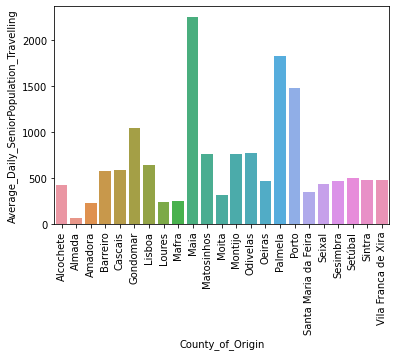

In [15]:
data_senior_counties = data_senior[['County_of_Origin', "Average_Daily_SeniorPopulation_Travelling"]].groupby("County_of_Origin").mean()
data_senior_counties.reset_index(inplace=True)
sns.barplot(x = 'County_of_Origin' , y = 'Average_Daily_SeniorPopulation_Travelling' ,data= data_senior_counties)
plt.xticks(rotation='vertical')
plt.show

# we can see the counties with the greatest average daily senior population travelling as a mean 
# the data_senior includes various means of transportation including foot, cars, buses etc...

In [16]:
data_senior_counties

,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
0,Alcochete,420.84058
1,Almada,69.14794
2,Amadora,228.70027
3,Barreiro,574.60637
4,Cascais,587.09165
5,Gondomar,1044.43129
6,Lisboa,644.09956
7,Loures,241.14726
8,Mafra,245.06257
9,Maia,2252.75972


In [17]:
data_senior['County_of_Origin'].unique() #23 counties

array(['Lisboa', 'Palmela', 'Oeiras', 'Vila Franca de Xira', 'Sintra',
       'Barreiro', 'Seixal', 'Almada', 'Amadora', 'Mafra', 'Odivelas',
       'Sesimbra', 'Maia', 'Loures', 'Porto', 'Gondomar', 'Setúbal',
       'Cascais', 'Montijo', 'Santa Maria da Feira', 'Matosinhos',
       'Moita', 'Alcochete'], dtype=object)

## data_users

In [18]:
data_users.head(15)
#bus usage per counties, gender, age and timeframe

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.19421
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.65282
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.83665
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.95132
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.14809
5,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,15-24,1148.42705
6,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,25-34,421.94018
7,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,35-44,137.69761
8,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,45-54,617.69316
9,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,55-64,867.48191


In [19]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Region_of_Origin          544 non-null    object 
 1   District_of_Origin        544 non-null    object 
 2   County_of_Origin          544 non-null    object 
 3   Period                    544 non-null    object 
 4   GenderDescription         544 non-null    object 
 5   AgeClassDescription       544 non-null    object 
 6   Average_BusUsers_per_Day  544 non-null    float64
dtypes: float64(1), object(6)
memory usage: 29.9+ KB


In [20]:
data_users.describe()

,Average_BusUsers_per_Day
count,544.00000
mean,1165.39664
std,3842.86774
min,5.51498
25%,158.80113
50%,475.67733
75%,990.06429
max,66882.20846


In [21]:
data_users_pre = data_users[data_users['Period']== 'Sep-19 to Feb-20']
data_users_covid = data_users[data_users['Period']== 'Sep-20 to Jan-21']

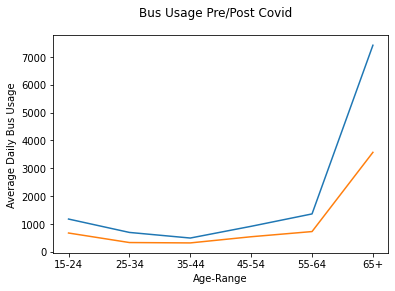

In [22]:
fig = plt.figure()
fig.suptitle('Bus Usage Pre/Post Covid')
plt.plot(data_users_pre.groupby("AgeClassDescription").mean()) #there is an average of 7'000 daily bus usage for seniors pre-covid
plt.plot(data_users_covid.groupby("AgeClassDescription").mean()) #there is an average of 3'500 daily bus usage for seniors pre- covid
plt.xlabel('Age-Range')
plt.ylabel('Average Daily Bus Usage')
plt.show()

In [23]:
average_decrease_bus_usage = (data_users_covid.groupby("AgeClassDescription").mean() - data_users_pre.groupby("AgeClassDescription").mean())\
                            /data_users_pre.groupby("AgeClassDescription").mean() * 100
average_decrease_bus_usage.reset_index(inplace=True)
average_decrease_bus_usage

,AgeClassDescription,Average_BusUsers_per_Day
0,15-24,-42.62315
1,25-34,-52.18168
2,35-44,-35.42488
3,45-54,-40.93281
4,55-64,-46.55205
5,65+,-51.84582


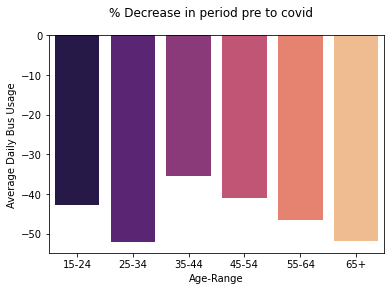

In [24]:
fig = plt.figure()
fig.suptitle('% Decrease in period pre to covid')
sns.set_palette('magma')
sns.barplot(x='AgeClassDescription', y='Average_BusUsers_per_Day', data = average_decrease_bus_usage)
plt.xlabel('Age-Range')
plt.ylabel('Average Daily Bus Usage')
plt.show()

### data_users_senior

In [25]:
data_users_senior =  data_users[data_users['AgeClassDescription']=='65+']
data_users_senior

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
10,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,65+,1612.85136
16,R1 - AM Lisboa,Lisboa,Cascais,Sep-19 to Feb-20,Female,65+,2017.33398
27,R1 - AM Lisboa,Lisboa,Lisboa,Sep-19 to Feb-20,Female,65+,4955.50375
33,R1 - AM Lisboa,Lisboa,Lisboa,Sep-19 to Feb-20,Male,65+,4116.75536
39,R1 - AM Lisboa,Lisboa,Loures,Sep-19 to Feb-20,Female,65+,147.47484
54,R1 - AM Lisboa,Lisboa,Mafra,Sep-19 to Feb-20,Male,65+,1217.08844
64,R1 - AM Lisboa,Lisboa,Odivelas,Sep-19 to Feb-20,Male,65+,5441.10949
70,R1 - AM Lisboa,Lisboa,Oeiras,Sep-19 to Feb-20,Female,65+,2264.58525
75,R1 - AM Lisboa,Lisboa,Oeiras,Sep-19 to Feb-20,Male,65+,9574.86854
81,R1 - AM Lisboa,Lisboa,Sintra,Sep-19 to Feb-20,Female,65+,341.16600


In [26]:
data_users_senior['County_of_Origin'].nunique()

23

In [27]:
data_sen_plot = data_users_senior[['County_of_Origin','Period','GenderDescription','Average_BusUsers_per_Day']]
data_sen_plot

,County_of_Origin,Period,GenderDescription,Average_BusUsers_per_Day
10,Amadora,Sep-19 to Feb-20,Male,1612.85136
16,Cascais,Sep-19 to Feb-20,Female,2017.33398
27,Lisboa,Sep-19 to Feb-20,Female,4955.50375
33,Lisboa,Sep-19 to Feb-20,Male,4116.75536
39,Loures,Sep-19 to Feb-20,Female,147.47484
54,Mafra,Sep-19 to Feb-20,Male,1217.08844
64,Odivelas,Sep-19 to Feb-20,Male,5441.10949
70,Oeiras,Sep-19 to Feb-20,Female,2264.58525
75,Oeiras,Sep-19 to Feb-20,Male,9574.86854
81,Sintra,Sep-19 to Feb-20,Female,341.16600


### Pre-covid

In [88]:
# For the pre-covid period
data_pre_covid = data_sen_plot[data_sen_plot['Period']== 'Sep-19 to Feb-20']
data_pre_covid

,County_of_Origin,Period,GenderDescription,Average_BusUsers_per_Day
10,Amadora,Sep-19 to Feb-20,Male,1612.85136
16,Cascais,Sep-19 to Feb-20,Female,2017.33398
27,Lisboa,Sep-19 to Feb-20,Female,4955.50375
33,Lisboa,Sep-19 to Feb-20,Male,4116.75536
39,Loures,Sep-19 to Feb-20,Female,147.47484
54,Mafra,Sep-19 to Feb-20,Male,1217.08844
64,Odivelas,Sep-19 to Feb-20,Male,5441.10949
70,Oeiras,Sep-19 to Feb-20,Female,2264.58525
75,Oeiras,Sep-19 to Feb-20,Male,9574.86854
81,Sintra,Sep-19 to Feb-20,Female,341.16600


In [29]:
data_pre_covid[data_pre_covid['County_of_Origin']=='Palmela']

,County_of_Origin,Period,GenderDescription,Average_BusUsers_per_Day
138,Palmela,Sep-19 to Feb-20,Female,2484.06564


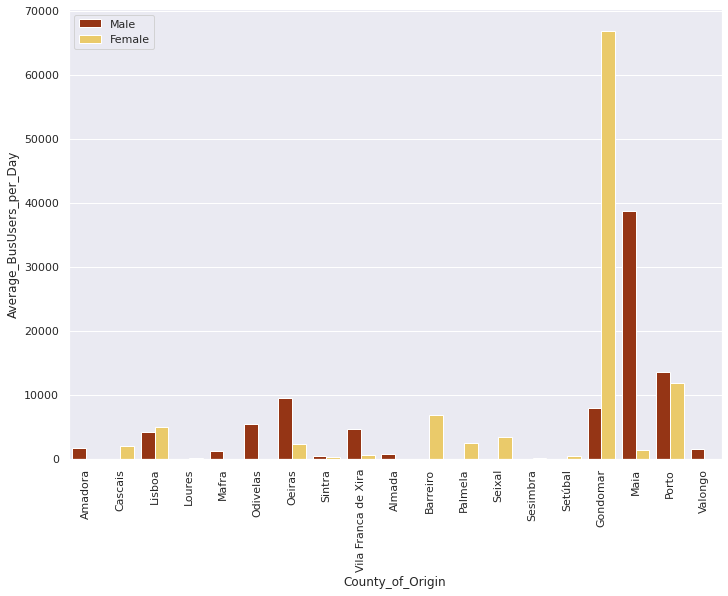

In [30]:
#average bus users per day per gender per counties pre-covid
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation='vertical')
sns.barplot(x='County_of_Origin', y='Average_BusUsers_per_Day', hue= 'GenderDescription',data = data_pre_covid, palette='afmhot')
plt.legend(loc=2)

### Covid

In [31]:
# For the covid period
data_covid = data_sen_plot[data_sen_plot['Period']== 'Sep-20 to Jan-21']
data_covid['County_of_Origin'].nunique()

21

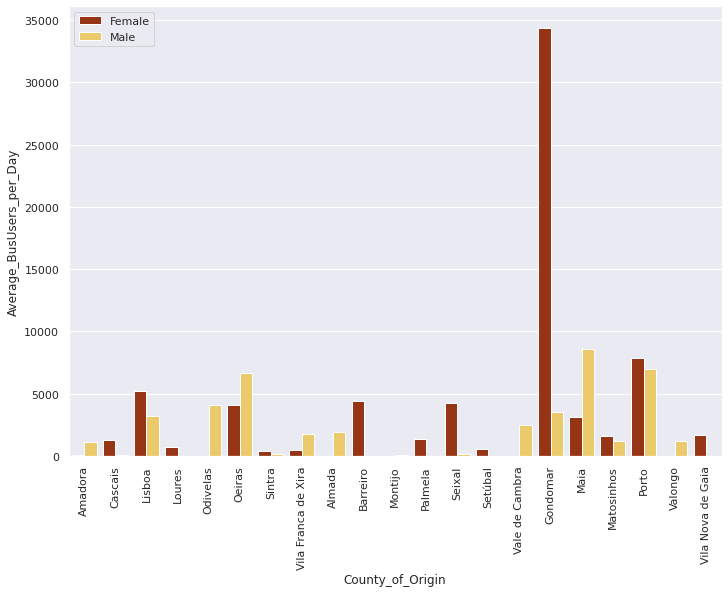

In [32]:
#average bus users per day per gender per counties post-covid
# I CANNOT CHANGE THE HUE COLOR WITH THE SAME AS ABOVE - NEED HELP
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation='vertical')
sns.barplot(x='County_of_Origin', y='Average_BusUsers_per_Day', hue= 'GenderDescription', data = data_covid, palette='afmhot')
plt.legend(loc=2)

### Pre & Post Covid Distinction

In [33]:
data_covid_sum_gend = data_covid.groupby('County_of_Origin').sum()
data_pre_sum_gend = data_pre_covid.groupby('County_of_Origin').sum()
data_pre_sum_gend.reset_index(inplace=True)
data_covid_sum_gend.reset_index(inplace=True)

In [34]:
data_covid_sum_gend

,County_of_Origin,Average_BusUsers_per_Day
0,Almada,1903.34334
1,Amadora,1165.03726
2,Barreiro,4419.36451
3,Cascais,1363.80012
4,Gondomar,37911.22728
5,Lisboa,8416.24178
6,Loures,702.81448
7,Maia,11683.68565
8,Matosinhos,2759.20641
9,Montijo,48.08526


In [35]:
data_pre_sum_gend

,County_of_Origin,Average_BusUsers_per_Day
0,Almada,754.47864
1,Amadora,1612.85136
2,Barreiro,6863.50890
3,Cascais,2017.33398
4,Gondomar,74829.25913
5,Lisboa,9072.25910
6,Loures,147.47484
7,Mafra,1217.08844
8,Maia,40152.82828
9,Odivelas,5441.10949


In [36]:
data_senior_covid = data_pre_sum_gend.merge(data_covid_sum_gend, on = 'County_of_Origin', how='left')
data_senior_covid.rename(columns={"Average_BusUsers_per_Day_x": "average_bus_per_day_pre", "Average_BusUsers_per_Day_y": "average_bus_per_day_cov"}, inplace=True)
data_senior_covid.head()

,County_of_Origin,average_bus_per_day_pre,average_bus_per_day_cov
0,Almada,754.47864,1903.34334
1,Amadora,1612.85136,1165.03726
2,Barreiro,6863.50890,4419.36451
3,Cascais,2017.33398,1363.80012
4,Gondomar,74829.25913,37911.22728


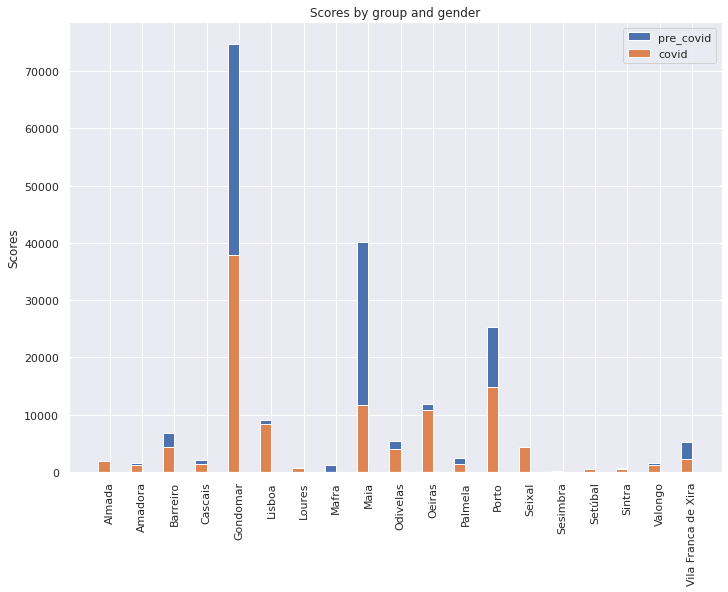

In [37]:
#Checking the drop in Average_BusUsers_per_Day before & After Covid - we can see that some regions such as Gondomar and Matosinhos
#have experienced huge declines
labels = data_senior_covid['County_of_Origin'].tolist()
x = np.arange(len(labels))
width = 0.35 
fig, ax = plt.subplots()

barPre = ax.bar(x - width/2, data_senior_covid['average_bus_per_day_pre'], width, label= 'pre_covid')
barCov = ax.bar(x - width/2, data_senior_covid['average_bus_per_day_cov'], width, label= 'covid')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation='vertical')
plt.show()

## data_od

In [38]:
data_od

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.30732
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.07000
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.06606
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.05985
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.05234
...,...,...,...,...,...,...,...,...
2248,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150315,0.00000
2249,R2 - AM Porto,Porto,Vila Nova de Gaia,R2 - AM Porto,PORTO,GONDOMAR,130414,0.00000
2250,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,LISBOA,ODIVELAS,111608,0.00000
2251,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150313,0.00000


In [39]:
data_od['Dicofre_ParishCode_of_Public_Transportation'].nunique() #100 parishes
#unique identifier for each Parish 
#It is designated DICOFRE in portuguese, related with de first terms of the words DIstrito, COncelho, FREguesia
#refers to destination

100

In [40]:
data_od[['Dicofre_ParishCode_of_Public_Transportation']]
#parish=freguesia FRE (six numbers); 
#municipality=concelho (first 4 numbers) CO; district=distrito DI (first two numbers) from DICOFRE

,Dicofre_ParishCode_of_Public_Transportation
0,110608
1,110639
2,110658
3,110654
4,110633
...,...
2248,150315
2249,130414
2250,111608
2251,150313


In [41]:
data_od[['County_of_Origin','Demand_weight']].groupby('County_of_Origin').sum()
# The demand weight is normalized per county. 
#This means that the sum of all the demand weights with the same county of origin will be around 1

,Demand_weight
County_of_Origin,
Alcochete,1.00000
Almada,1.00001
Amadora,1.00001
Barreiro,1.00000
Cascais,1.00000
Espinho,1.00000
Gondomar,1.00000
Lisboa,1.00000
Loures,1.00000


## Transporlis - Lisbon : Data Exploration 

In [42]:
org_transporlis = ['carris','carristur','cp','fertagus','metro_de_lisboa','metro_transportes_do_sul',
                   'sul_fertagus','transtejo_soflusa','tst']

In [43]:
files = ['agency','calendar','calendar_dates','frequencies','routes','shapes','stop_times','stops','trips']

In [44]:
df_transporlis = [pd.read_csv(f"transporlis_data/data_{org}/{f}.txt") for org in org_transporlis for f in files]

In [45]:
df_transporlis # data for all transportation companies into simple list of dataframes

[   agency_id agency_name            agency_url agency_timezone agency_lang  \
 0          1      Carris  http://www.carris.pt   Europe/Lisbon          pt   
 
    agency_phone  
 0           NaN  ,
        service_id  monday  tuesday  wednesday  thursday  friday  saturday  \
 0        27581474       1        1          1         1       1         0   
 1        27581484       1        1          1         1       1         0   
 2        27581489       1        1          1         1       1         0   
 3        27581544       1        1          1         1       1         0   
 4        27581494       1        1          1         1       1         0   
 ...           ...     ...      ...        ...       ...     ...       ...   
 12992    27592493       0        0          0         0       0         0   
 12993    27592971       1        1          1         1       1         0   
 12994    27592796       1        1          1         1       1         0   
 12995    27593132   

In [46]:
df_transporlis[18]

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,3,CP,https://www.cp.pt/,Europe/Lisbon,pt,NaN


In [47]:
df_transporlis = [df_transporlis[x:x+9] for x in range(0, len(df_transporlis))]
# seperating the the list of dfs into list of list of dfs

In [48]:
df_transporlis[1][0] #list of dfs for Carris for example

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,27581474,1,1,1,1,1,0,0,20210406,20210602
1,27581484,1,1,1,1,1,0,0,20210406,20210602
2,27581489,1,1,1,1,1,0,0,20210406,20210602
3,27581544,1,1,1,1,1,0,0,20210406,20210602
4,27581494,1,1,1,1,1,0,0,20210406,20210602
...,...,...,...,...,...,...,...,...,...,...
12992,27592493,0,0,0,0,0,0,1,20210411,20210725
12993,27592971,1,1,1,1,1,0,0,20210406,20210602
12994,27592796,1,1,1,1,1,0,0,20210406,20210602
12995,27593132,0,0,0,0,0,0,0,20210217,20211231


## PORDATA: Data Exploration

### Population by age range by county

In [49]:
df_pop_raw = pd.read_csv('county_data/PORDATA_Estimativas-a-31-12-por-grupo-etário.csv',dtype=None)

In [50]:
df_pop_raw = df_pop_raw.iloc[0:353,:40]
df_pop_raw

,Âmbito Geográfico,Regions,Total: 2001,Total : 2019,0-4,0-4.1,5-9,5-9.1,10-14,10-14.1,...,65-69,65-69.1,70-74,70-74.1,75-79,75-79.1,80-84,80-84.1,85 ou mais,85 ou mais.1
0,NUTS 2013,Portugal,"10,394,669","10,295,909","556,833","436,202","548,114","455,843","574,545","504,940",...,"539,287","622,912","456,817","549,591","354,378","432,058","209,569","353,254","162,366","322,609"
1,NUTS I,Continente,"9,904,113","9,798,859","525,390","415,473","515,492","432,930","539,279","477,944",...,"518,165","597,684","439,307","530,304","341,074","417,242","201,811","342,218","156,406","313,522"
2,NUTS II,Norte,"3,696,333","3,575,338","211,121","138,522","213,563","145,676","224,421","167,426",...,"168,103","218,242","140,778","182,316","106,234","136,239","62,413","112,356","46,052","99,632"
3,NUTS III,Alto Minho,"250,491","230,412","11,676","7,784","12,438","8,234","13,688","9,839",...,"15,261","14,333","13,158","12,748","10,505","10,936","6,555","10,251","5,059","10,104"
4,Município,Arcos de Valdevez,"24,657","20,926",944,563,996,657,"1,206",774,...,"1,927","1,329","1,687","1,338","1,427","1,282",931,"1,343",721,"1,515"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,Município,Santa Cruz,"31,028","45,281","2,060","1,968","2,054","2,236","2,127","2,809",...,"1,127","1,817",905,"1,301",708,974,415,716,329,523
349,Município,Santana,"8,722","6,711",391,205,446,189,509,261,...,624,418,502,353,341,343,199,282,126,277
350,Município,São Vicente,"6,185","5,143",302,140,337,139,406,218,...,441,272,358,264,242,266,145,225,113,280
351,NUTS III,Ilha de Porto Santo,"4,573","5,202",244,172,260,239,309,256,...,191,240,131,157,68,134,41,110,37,68


In [51]:
counties = data_senior['County_of_Origin'].unique()
counties

array(['Lisboa', 'Palmela', 'Oeiras', 'Vila Franca de Xira', 'Sintra',
       'Barreiro', 'Seixal', 'Almada', 'Amadora', 'Mafra', 'Odivelas',
       'Sesimbra', 'Maia', 'Loures', 'Porto', 'Gondomar', 'Setúbal',
       'Cascais', 'Montijo', 'Santa Maria da Feira', 'Matosinhos',
       'Moita', 'Alcochete'], dtype=object)

In [52]:
counties_pop = df_pop_raw[df_pop_raw['Regions'].isin(counties)].drop(columns = 'Âmbito Geográfico')
counties_pop.set_index('Regions',inplace=True)

In [53]:
counties_pop_sen = counties_pop.drop(columns = counties_pop.iloc[:,2:26])
columns_2001 = [col for col in counties_pop_sen.columns if '.' in col]
columns_2019 = [col for col in counties_pop_sen.columns if '.' not in col]
columns_2019.remove('Total: 2001')
columns_2019.remove('Total : 2019')

In [54]:
counties_pop_sen = counties_pop_sen.apply(lambda x: x.str.replace(',', ''))

In [55]:
counties_pop_sen = counties_pop_sen.astype(int)

In [56]:
counties_pop_sen['Total +65: 2001'] = counties_pop_sen[columns_2001].sum(axis = 1) # total seniors 2001
counties_pop_sen['Total +65 : 2019'] = counties_pop_sen[columns_2019].sum(axis = 1) # total seniors 2019

In [57]:
#counties_pop_sen.drop([col for col in counties_pop_sen.columns if '.' in col],axis=1,inplace=True)
counties_pop_sen
#population data for all counties in data_senior

,Total: 2001,Total : 2019,60-64,60-64.1,65-69,65-69.1,70-74,70-74.1,75-79,75-79.1,80-84,80-84.1,85 ou mais,85 ou mais.1,Total +65: 2001,Total +65 : 2019
Regions,,,,,,,,,,,,,,,,
Gondomar,164844,165985,7202,11845,6379,10555,5042,8755,3574,6222,1928,4450,1418,3364,45191,25543
Maia,121699,138971,5068,8743,4525,7801,3541,6617,2467,4512,1421,3339,955,2631,33643,17977
Matosinhos,168149,175357,7818,12716,7102,11850,5782,9977,4124,7023,2308,5024,1761,3884,50474,28895
Porto,261132,216606,15090,15753,14908,15790,13834,15193,10873,11280,6493,9409,5071,10044,77469,66269
Santa Maria da Feira,136555,138636,5888,9668,5362,8182,4153,6743,2980,4771,1621,3856,1265,3079,36299,21269
Alcochete,13415,19787,708,924,659,857,541,834,448,691,224,476,184,447,4229,2764
Almada,162322,169039,9700,11037,9335,10469,7767,9777,5390,7876,2936,6144,2339,5111,50414,37467
Amadora,176027,184106,10462,11324,9399,11186,7100,10936,4714,8780,2489,6460,1561,5890,54576,35725
Barreiro,79037,75147,5195,4830,4353,5194,3351,5565,2564,4459,1432,3105,1103,1767,24920,17998


### Aging Index per county

In [58]:
df_age_raw = pd.read_csv('county_data/PORDATA_aging_index_counties.csv',dtype=None)
df_age_raw.set_index('Regions')

,2001,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Regions,,,,,,,,,,,,
Gondomar,62.70000,86.20000,91.10000,96.90000,102.50000,108.9,116.10000,124.10000,132.10000,139.80000,147.40000,154.20000
Maia,59.50000,72.30000,75.50000,79.40000,83.80000,89.2,94.90000,100.60000,106.50000,112.10000,117.30000,122.40000
Matosinhos,76.40000,99.90000,105.20000,111.30000,116.90000,123.4,130.40000,137.30000,143.80000,149.30000,154.40000,159.60000
Porto,145.80000,181.00000,188.30000,195.90000,201.90000,207.5,213.70000,219.90000,222.50000,221.90000,220.70000,218.80000
Santa Maria da Feira,59.90000,84.40000,88.90000,94.10000,98.60000,103.9,110.40000,117.90000,125.40000,132.60000,140.20000,148.00000
Alcochete,93.60000,75.70000,76.10000,77.30000,78.80000,81.1,84.00000,87.60000,91.50000,94.30000,97.00000,100.40000
Almada,118.00000,122.00000,126.40000,130.60000,133.80000,138,141.90000,145.50000,148.50000,151.10000,153.60000,155.10000
Amadora,93.00000,126.30000,130.00000,132.70000,135.60000,139,142.30000,145.30000,147.60000,149.00000,149.80000,149.70000
Barreiro,121.50000,140.80000,146.90000,151.60000,154.30000,158.5,164.50000,170.20000,175.40000,180.80000,185.40000,189.80000


### Elderly Dependency Index - Where are there more and less elderly people per 100 people of working age?

In [59]:
df_eld_dep_raw = pd.read_csv('county_data/PORDATA_early_dependence_index.csv',dtype=None)
df_eld_dep_raw

,Regions,1960,1981,2001,2011
0,Portugal,12.7,18.2,24.2,28.8
1,Continente,12.8,18.1,24.4,29.2
2,Norte,11.8,16,20.4,25.2
3,Alto Minho,16.4,23.7,30.7,36.4
4,Arcos de Valdevez,17.2,28.4,44.4,53.4
...,...,...,...,...,...
372,NaN,NaN,NaN,NaN,NaN
373,NaN,NaN,NaN,NaN,NaN
374,NaN,NaN,NaN,NaN,NaN
375,NaN,NaN,NaN,NaN,NaN


In [60]:
df_eld_dep = df_eld_dep_raw[df_eld_dep_raw['Regions'].isin(counties)]

In [61]:
df_eld_dep.set_index('Regions',inplace=True)
df_eld_dep

,1960,1981,2001,2011
Regions,,,,
Gondomar,9,11.2,15.3,21.5
Maia,9.1,12,14.6,19.2
Matosinhos,8.7,11.8,17.1,23.2
Porto,11.9,18.1,28.7,35.7
Santa Maria da Feira,10.6,11.8,15.7,21.3
Alcochete,12.4,16.3,22.5,21.7
Almada,7.2,11.8,24.2,31.7
Amadora,-,9,19.7,28.1
Barreiro,9.7,11.8,22.2,33.7


### Single Person Families - where are more and less people living alone? Where are more elderly people living alone?

In [62]:
df_single_fam_raw = pd.read_csv('county_data/PORDATA_single_person_families.csv',dtype=None)
df_single_fam_raw

,Regions,Total: 1981,Total: 2001,Total: 2011,65+ :1981,65+ : 2001,65+ :2011
0,Portugal,"379,245","631,762","866,827","196,978","321,054","406,942"
1,Continente,"366,382","611,627","834,680","190,015","310,860","393,590"
2,Norte,"92,810","159,894","228,923","52,115","84,003","109,884"
3,Alto Minho,"9,160","13,098","17,241","5,446","8,088","9,983"
4,Arcos de Valdevez,"1,636","1,959","2,285","1,025","1,346","1,513"
...,...,...,...,...,...,...,...
348,Santa Cruz,670,"1,067","2,537",399,504,755
349,Santana,315,578,746,157,375,486
350,São Vicente,275,460,555,167,268,318
351,Ilha de Porto Santo,79,185,472,38,67,130


In [63]:
df_single_fam = df_single_fam_raw[df_single_fam_raw['Regions'].isin(counties)]

In [64]:
df_single_fam.set_index('Regions',inplace=True)
df_single_fam

,Total: 1981,Total: 2001,Total: 2011,65+ :1981,65+ : 2001,65+ :2011
Regions,,,,,,
Gondomar,"2,272","5,797","9,466","1,223","2,725","4,132"
Maia,"1,312","4,595","8,439",708,"1,793","2,939"
Matosinhos,"3,198","8,102","14,004","1,468","3,350","5,157"
Porto,"15,647","25,480","30,736","6,423","11,069","13,329"
Santa Maria da Feira,"1,763","4,297","6,529","1,040","2,252","3,132"
Alcochete,461,835,"1,402",253,416,571
Almada,"4,584","11,955","18,544","1,625","5,112","7,846"
Amadora,"5,935","14,556","20,119","1,397","5,095","7,948"
Barreiro,"2,290","5,297","8,113","1,064","2,618","3,804"


### Population Density - where are there more and less people, on average, per km 2 ?

In [65]:
df_pop_dense_raw = pd.read_csv('county_data/PORDATA_population_density.csv',dtype=None)
df_pop_dense_raw

,Regions,2001,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Portugal,112.5,114.6,114.7,114.5,114,113.4,112.8,112.3,112,111.7,111.5,111.5
1,Continente,110.9,112.9,112.9,112.7,112.3,111.6,111,110.6,110.3,110,109.8,109.9
2,Norte,173.2,174.3,173.8,173.4,172.7,171.7,170.7,169.7,168.9,168.2,167.9,167.9
3,Alto Minho,112.7,111.4,110.9,110.3,109.6,108.7,107.7,106.9,105.9,105,104.4,104
4,Arcos de Valdevez,55.2,52,51.5,51,50.4,49.8,49.2,48.6,48,47.4,47,46.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df_pop_dense = df_pop_dense_raw[df_pop_dense_raw['Regions'].isin(counties)]
df_pop_dense = df_pop_dense.iloc[:353].set_index('Regions')
df_pop_dense

,2001,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Regions,,,,,,,,,,,,
Gondomar,"1,250.30","1,276.80","1,276.20","1,276.10","1,275.50","1,272.30","1,267.90","1,263.40","1,259.20","1,255.90","1,255.50","1,256.90"
Maia,"1,450.80","1,606.50","1,621.00","1,634.30","1,638.40","1,638.30","1,637.10","1,635.70","1,636.90","1,644.40","1,654.80","1,668.10"
Matosinhos,"2,704.60","2,810.70","2,810.20","2,815.40","2,813.10","2,803.70","2,793.50","2,783.50","2,777.90","2,780.30","2,788.60","2,801.50"
Porto,"6,310.50","5,877.20","5,785.80","5,686.90","5,560.00","5,429.60","5,317.20","5,224.60","5,175.00","5,175.10","5,189.20","5,213.50"
Santa Maria da Feira,632.5,646.5,646.1,647.2,648.7,648.8,647.7,646.4,644.7,642.7,641.9,641.9
Alcochete,99.3,131.3,135,138.2,140.6,142.5,144.4,145.9,147.3,149.2,151.1,153.1
Almada,"2,296.60","2,455.70","2,473.20","2,477.00","2,462.60","2,442.50","2,427.80","2,427.00","2,421.20","2,417.40","2,414.90","2,414.10"
Amadora,"7,375.50","7,372.30","7,366.40","7,376.10","7,386.50","7,378.40","7,385.10","7,413.70","7,460.30","7,529.70","7,604.40","7,692.00"
Barreiro,"2,466.90","2,170.40","2,170.00","2,163.80","2,150.50","2,131.80","2,115.70","2,105.10","2,094.10","2,084.30","2,076.60","2,068.80"


### Habitants per pharmacy and per doctors

In [67]:
df_hab_per_health_raw = pd.read_csv('county_data/PORDATA_habitants_per_pharmacy_doctors.csv',dtype=None)
df_hab_per_health_raw

,Regions,Doctors: 2001,Doctors: 2019,Pharmacists: 2001,Pharmacists: 2019
0,Portugal,311.8,185.6,"1,365.30",742.5
1,Continente,305.2,183.2,"1,328.70",730
2,Norte,351.2,186.2,"1,816.80",871.1
3,Alto Minho,523.2,254.1,"2,381.70",857.6
4,Arcos de Valdevez,"1,234.30",476.1,"4,114.30",837.9
...,...,...,...,...,...
348,Santa Cruz,561.1,326.2,"3,787.60","1,667.10"
349,Santana,"4,374.80","1,346.10","2,916.50","1,346.10"
350,São Vicente,"2,059.50",857.8,"2,059.50","1,286.60"
351,Ilha de Porto Santo,"4,517.50",518.9,"1,129.40","2,594.50"


In [68]:
df_hab_per_health = df_hab_per_health_raw[df_hab_per_health_raw['Regions'].isin(counties)]
df_hab_per_health = df_hab_per_health.iloc[:353].set_index('Regions')
df_hab_per_health

,Doctors: 2001,Doctors: 2019,Pharmacists: 2001,Pharmacists: 2019
Regions,,,,
Gondomar,441.8,234.2,"2,785.30","1,167.70"
Maia,281.5,149.4,"2,464.10",941.1
Matosinhos,188.8,106.8,"1,691.20",767
Porto,69,43.3,433.8,284.9
Santa Maria da Feira,901.3,333.9,"2,430.20",997
Alcochete,942.2,322.1,"3,297.80",755.6
Almada,299.2,213.7,"1,390.50",698.4
Amadora,316.8,319.8,914.2,650.9
Barreiro,424.5,286.2,"1,178.50",697.1


### Road accidents with victims - Where are there more and less disasters on the roads with injuries or deaths?

In [69]:
df_road_acc_raw = pd.read_csv('county_data/PORDATA_road_accidents.csv',dtype=None)
df_road_acc_raw

,Regions,1987,2019
0,Portugal,x,x
1,Continente,"38,656","35,704"
2,Norte,"12,153","12,850"
3,Alto Minho,862,859
4,Arcos de Valdevez,49,73
...,...,...,...
352,Porto Santo,x,x
353,NaN,NaN,NaN
354,NaN,NaN,NaN
355,NaN,NaN,NaN


In [70]:
df_road_acc = df_road_acc_raw[df_road_acc_raw['Regions'].isin(counties)]
df_road_acc = df_road_acc.iloc[:353].set_index('Regions')
df_road_acc

,1987,2019
Regions,,
Gondomar,225,462
Maia,254,399
Matosinhos,439,527
Porto,"1,477","1,090"
Santa Maria da Feira,443,523
Alcochete,37,66
Almada,565,496
Amadora,374,602
Barreiro,320,190


### Environmental Expenditure - Which municipalities spend a greater or lesser percentage of expenses on the environment?

In [71]:
df_env_exp_raw = pd.read_csv('county_data/PORDATA_environment_expenditure.csv',dtype=None)
df_env_exp_raw

,Regions,2001,2018
0,Portugal,7.9,8.30000
1,Continente,7.8,8.20000
2,Norte,5.9,7.10000
3,Alto Minho,4.9,5.30000
4,Arcos de Valdevez,6.3,5.30000
...,...,...,...
348,Santa Cruz,39.6,18.40000
349,Santana,3.3,2.60000
350,São Vicente,5,10.80000
351,Ilha de Porto Santo,8,5.60000


In [72]:
df_env_exp = df_env_exp_raw[df_env_exp_raw['Regions'].isin(counties)]
df_env_exp = df_env_exp.iloc[:353].set_index('Regions')
df_env_exp

,2001,2018
Regions,,
Gondomar,9.7,14.70000
Maia,7.9,6.40000
Matosinhos,5.2,11.00000
Porto,5.9,8.50000
Santa Maria da Feira,2,7.50000
Alcochete,11,4.20000
Almada,3.5,14.80000
Amadora,7.1,12.60000
Barreiro,7,7.80000


### Population by Sex

In [73]:
df_pop_by_sex_raw = pd.read_csv('county_data/PORDATA_population_by_sex.csv',dtype=None)
df_pop_by_sex_raw

,Regions,T: 2001,T: 2011,M: 2001,M: 2011,F: 2001,F: 2011
0,Portugal,"10,356,117","10,562,178","5,000,141","5,046,600","5,355,976","5,515,578"
1,Continente,"9,869,343","10,047,621","4,765,444","4,798,798","5,103,899","5,248,823"
2,Norte,"3,687,293","3,689,682","1,782,931","1,766,260","1,904,362","1,923,422"
3,Alto Minho,"250,275","244,836","116,808","114,369","133,467","130,467"
4,Arcos de Valdevez,"24,761","22,847","11,299","10,429","13,462","12,418"
...,...,...,...,...,...,...,...
349,Santana,"8,804","7,719","4,075","3,530","4,729","4,189"
350,São Vicente,"6,198","5,723","2,836","2,668","3,362","3,055"
351,Ilha de Porto Santo,"4,474","5,483","2,241","2,746","2,233","2,737"
352,Porto Santo,"4,474","5,483","2,241","2,746","2,233","2,737"


In [74]:
df_pop_by_sex = df_pop_by_sex_raw[df_pop_by_sex_raw['Regions'].isin(counties)]
df_pop_by_sex = df_pop_by_sex.iloc[:353].set_index('Regions')
df_pop_by_sex

,T: 2001,T: 2011,M: 2001,M: 2011,F: 2001,F: 2011
Regions,,,,,,
Gondomar,"164,096","168,027","80,103","81,007","83,993","87,020"
Maia,"120,111","135,306","58,387","64,855","61,724","70,451"
Matosinhos,"167,026","175,478","80,959","83,444","86,067","92,034"
Porto,"263,131","237,591","119,715","108,104","143,416","129,487"
Santa Maria da Feira,"135,964","139,312","66,518","67,402","69,446","71,910"
Alcochete,"13,010","17,569","6,376","8,494","6,634","9,075"
Almada,"160,825","174,030","77,815","82,496","83,010","91,534"
Amadora,"175,872","175,136","84,394","82,342","91,478","92,794"
Barreiro,"79,012","78,764","38,283","37,347","40,729","41,417"


### Per Capita Purchasing Power

In [75]:
df_purch_power_raw = pd.read_csv('county_data/PORDATA_Poder-de-compra-per-capita.csv',dtype=None)
df_purch_power_raw

,Regions,1993,2017
0,Portugal,100,100
1,Continente,101.8,100.7
2,Norte,81.7,92.1
3,Alto Minho,55.3,79.7
4,Arcos de Valdevez,36.5,67.8
...,...,...,...
348,Santa Cruz,43.3,71.5
349,Santana,30.1,58.3
350,São Vicente,25.6,61
351,Ilha de Porto Santo,50.6,93.5


In [76]:
df_purch_power = df_purch_power_raw[df_purch_power_raw['Regions'].isin(counties)]
df_purch_power = df_purch_power.iloc[:353].set_index('Regions')
df_purch_power

,1993,2017
Regions,,
Gondomar,84.4,84.1
Maia,109,110.7
Matosinhos,132.2,123
Porto,226.9,157.8
Santa Maria da Feira,61,84.8
Alcochete,75.3,118.8
Almada,119.9,108.7
Amadora,132.6,100.6
Barreiro,90.9,100


# Joining datasets

In [77]:
# I would like to match the provided WDL datasets data_senior and data_users with the datasets on demographics

## Matching Average Bus Users with population of counties

In [78]:
data_users.shape

(544, 7)

In [79]:
data_users_senior.groupby(['County_of_Origin','Period','GenderDescription']).sum()

Average_BusUsers_per_Day
County_of_Origin    Period           GenderDescription                          
Almada              Sep-19 to Feb-20 Male                              754.47864
                    Sep-20 to Jan-21 Male                             1903.34334
Amadora             Sep-19 to Feb-20 Male                             1612.85136
                    Sep-20 to Jan-21 Female                             72.44378
                                     Male                             1092.59348
Barreiro            Sep-19 to Feb-20 Female                           6863.50890
                    Sep-20 to Jan-21 Female                           4419.36451
Cascais             Sep-19 to Feb-20 Female                           2017.33398
                    Sep-20 to Jan-21 Female                           1308.84554
                                     Male                               54.95458
Gondomar            Sep-19 to Feb-20 Female                          66882.20846
                                     Male                             7947.05067
                    Sep-20 to Jan-21 Female                          34406.41796
                                     Male                             3504.80932
Lisboa              Sep-19 to Feb-20 Female                           4955.50375
                                     Male                             4116.75536
                    Sep-20 to Jan-21 Female                           5225.80479
                                     Male                             3190.43700
Loures              Sep-19 to Feb-20 Female                            147.47484
                    Sep-20 to Jan-21 Female                            702.81448
Mafra               Sep-19 to Feb-20 Male                             1217.08844
Maia                Sep-19 to Feb-20 Female                           1421.82325
                                     Male                            38731.00503
                    Sep-20 to Jan-21 Female                           3087.37997
                                     Male                             8596.30568
Matosinhos          Sep-20 to Jan-21 Female                           1561.77024
                                     Male                             1197.43617
Montijo             Sep-20 to Jan-21 Male                               48.08526
Odivelas            Sep-19 to Feb-20 Male                             5441.10949
                    Sep-20 to Jan-21 Male                             4068.79843
Oeiras              Sep-19 to Feb-20 Female                           2264.58525
                                     Male                             9574.86854
                    Sep-20 to Jan-21 Female                           4091.99908
                                     Male                             6687.30283
Palmela             Sep-19 to Feb-20 Female                           2484.06564
                    Sep-20 to Jan-21 Female                           1340.85446
Porto               Sep-19 to Feb-20 Female                          11774.91845
                                     Male                            13509.24184
                    Sep-20 to Jan-21 Female                           7867.45385
                                     Male                             6940.27392
Seixal              Sep-19 to Feb-20 Female                           3368.06349
                    Sep-20 to Jan-21 Female                           4219.51999
                                     Male                              148.16726
Sesimbra            Sep-19 to Feb-20 Female                             67.91604
Setúbal             Sep-19 to Feb-20 Female                            442.94563
                    Sep-20 to Jan-21 Female                            543.32836
Sintra              Sep-19 to Feb-20 Female                            341.16600
                                     Male                              371.20761
      

In [80]:
data_senior_covid #pandas dataframe with the average bus usage per county for senior citizens

,County_of_Origin,average_bus_per_day_pre,average_bus_per_day_cov
0,Almada,754.47864,1903.34334
1,Amadora,1612.85136,1165.03726
2,Barreiro,6863.50890,4419.36451
3,Cascais,2017.33398,1363.80012
4,Gondomar,74829.25913,37911.22728
5,Lisboa,9072.25910,8416.24178
6,Loures,147.47484,702.81448
7,Mafra,1217.08844,NaN
8,Maia,40152.82828,11683.68565
9,Odivelas,5441.10949,4068.79843


In [81]:
counties_pop_only_sen = counties_pop_sen[['Total +65: 2001','Total +65 : 2019']]
counties_pop_only_sen.reset_index(inplace=True)
counties_pop_only_sen.rename(columns={'Regions':'County_of_Origin'}, inplace=True)

/home/sisto/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [82]:
counties_pop_only_sen

,County_of_Origin,Total +65: 2001,Total +65 : 2019
0,Gondomar,45191,25543
1,Maia,33643,17977
2,Matosinhos,50474,28895
3,Porto,77469,66269
4,Santa Maria da Feira,36299,21269
5,Alcochete,4229,2764
6,Almada,50414,37467
7,Amadora,54576,35725
8,Barreiro,24920,17998
9,Cascais,56525,36034


In [83]:
data_merge_pop_bus = counties_pop_only_sen.merge(data_senior_covid, on='County_of_Origin', how='right')
data_merge_pop_bus

,County_of_Origin,Total +65: 2001,Total +65 : 2019,average_bus_per_day_pre,average_bus_per_day_cov
0,Almada,50414.00000,37467.00000,754.47864,1903.34334
1,Amadora,54576.00000,35725.00000,1612.85136,1165.03726
2,Barreiro,24920.00000,17998.00000,6863.50890,4419.36451
3,Cascais,56525.00000,36034.00000,2017.33398,1363.80012
4,Gondomar,45191.00000,25543.00000,74829.25913,37911.22728
5,Lisboa,175242.00000,170467.00000,9072.25910,8416.24178
6,Loures,59896.00000,35941.00000,147.47484,702.81448
7,Mafra,17957.00000,11646.00000,1217.08844,NaN
8,Maia,33643.00000,17977.00000,40152.82828,11683.68565
9,Odivelas,43235.00000,23920.00000,5441.10949,4068.79843


In [84]:
data_merge_pop_bus['Pre-Covid: % of Bus Users '] = data_merge_pop_bus['average_bus_per_day_pre'] / data_merge_pop_bus['Total +65 : 2019']*100
data_merge_pop_bus['Covid: % of Bus Users '] = data_merge_pop_bus['average_bus_per_day_cov'] / data_merge_pop_bus['Total +65 : 2019']*100

In [85]:
data_merge_pop_bus #why are there more bus users than % in Gondomar and Maia ?? How is that possible ? Back & Forth included ?

,County_of_Origin,Total +65: 2001,Total +65 : 2019,average_bus_per_day_pre,average_bus_per_day_cov,Pre-Covid: % of Bus Users,Covid: % of Bus Users
0,Almada,50414.00000,37467.00000,754.47864,1903.34334,2.01372,5.08005
1,Amadora,54576.00000,35725.00000,1612.85136,1165.03726,4.51463,3.26113
2,Barreiro,24920.00000,17998.00000,6863.50890,4419.36451,38.13484,24.55475
3,Cascais,56525.00000,36034.00000,2017.33398,1363.80012,5.59842,3.78476
4,Gondomar,45191.00000,25543.00000,74829.25913,37911.22728,292.95407,148.42120
5,Lisboa,175242.00000,170467.00000,9072.25910,8416.24178,5.32200,4.93717
6,Loures,59896.00000,35941.00000,147.47484,702.81448,0.41032,1.95547
7,Mafra,17957.00000,11646.00000,1217.08844,NaN,10.45070,NaN
8,Maia,33643.00000,17977.00000,40152.82828,11683.68565,223.35667,64.99241
9,Odivelas,43235.00000,23920.00000,5441.10949,4068.79843,22.74711,17.01003


In [86]:
df_purch_power.reset_index(inplace=True)
df_purch_power.rename(columns={'Regions':'County_of_Origin','1993':'Purchasing Power 1993','2017':'Purchasing Power 2017'}, inplace=True)
data_merge_pop_bus_purch = data_merge_pop_bus.merge(df_purch_power, on='County_of_Origin', how='right')
data_merge_pop_bus_purch

,County_of_Origin,Total +65: 2001,Total +65 : 2019,average_bus_per_day_pre,average_bus_per_day_cov,Pre-Covid: % of Bus Users,Covid: % of Bus Users,Purchasing Power 1993,Purchasing Power 2017
0,Gondomar,45191.00000,25543.00000,74829.25913,37911.22728,292.95407,148.42120,84.4,84.1
1,Maia,33643.00000,17977.00000,40152.82828,11683.68565,223.35667,64.99241,109,110.7
2,Matosinhos,NaN,NaN,NaN,NaN,NaN,NaN,132.2,123
3,Porto,77469.00000,66269.00000,25284.16029,14807.72777,38.15383,22.34488,226.9,157.8
4,Santa Maria da Feira,NaN,NaN,NaN,NaN,NaN,NaN,61,84.8
5,Alcochete,NaN,NaN,NaN,NaN,NaN,NaN,75.3,118.8
6,Almada,50414.00000,37467.00000,754.47864,1903.34334,2.01372,5.08005,119.9,108.7
7,Amadora,54576.00000,35725.00000,1612.85136,1165.03726,4.51463,3.26113,132.6,100.6
8,Barreiro,24920.00000,17998.00000,6863.50890,4419.36451,38.13484,24.55475,90.9,100
9,Cascais,56525.00000,36034.00000,2017.33398,1363.80012,5.59842,3.78476,144.8,122.1


In [87]:
data_senior_counties 

,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
0,Alcochete,420.84058
1,Almada,69.14794
2,Amadora,228.70027
3,Barreiro,574.60637
4,Cascais,587.09165
5,Gondomar,1044.43129
6,Lisboa,644.09956
7,Loures,241.14726
8,Mafra,245.06257
9,Maia,2252.75972


## Heatmap data_seniors